<a href="https://colab.research.google.com/github/Pipoxsj/ML-For-Beginners/blob/main/Landa%2C_Ricardo_%E2%80%93_Transformaci%C3%B3n_digital_orientada_a_datos_en_Leplag_Fumigaciones_%E2%80%93_TFG_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Subí archivo CSV desde mi PC a Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print(f'Se subió el archivo "{fn}" con tamaño {len(uploaded[fn])} bytes')


Saving dataset_complementario_regresion_anonimizado-2.csv to dataset_complementario_regresion_anonimizado-2.csv
Se subió el archivo "dataset_complementario_regresion_anonimizado-2.csv" con tamaño 1202941 bytes


Cargar el CSV en pandas para verlo


In [3]:
import pandas as pd
nombre_archivo = 'dataset_complementario_regresion_anonimizado-2.csv'
df = pd.read_csv(nombre_archivo)
print("Primeras 5 filas del dataset:")
display(df.head())
print("\nDimensión del dataset (filas, columnas):", df.shape)

Primeras 5 filas del dataset:


,id_cliente_anon,zona,tipo_cliente,mes,tipo_servicio,superficie_m2,distancia_km,tecnico_id,servicios_mes,monto_mensual_ars
0,1,RAWSON,Residencial,1,Fumigación,301,10.7,1,3,29002
1,1,RAWSON,Residencial,2,Desratización,76,11.0,6,1,6273
2,1,RAWSON,Residencial,3,Desinfección,99,9.0,8,0,4280
3,1,RAWSON,Residencial,4,Desinfección,53,9.7,4,0,497
4,1,RAWSON,Residencial,5,Fumigación,110,9.9,4,1,9185



Dimensión del dataset (filas, columnas): (19428, 10)


Exploración inicial del dataset

In [5]:
print("=== Dimensión del dataset ===")
print("Filas, columnas:", df.shape)

print("\n=== Tipos de datos por columna ===")
print(df.dtypes)

print("\n=== Información general del DataFrame (df.info) ===")
df.info()

print("\n=== Cantidad de valores faltantes por columna ===")
print(df.isnull().sum())

print("\n=== Estadísticos descriptivos de variables numéricas ===")
display(df.describe())

print("\n=== Primeras 10 filas (vista rápida de los datos) ===")
display(df.head(10))


=== Dimensión del dataset ===
Filas, columnas: (19428, 10)

=== Tipos de datos por columna ===
id_cliente_anon        int64
zona                  object
tipo_cliente          object
mes                    int64
tipo_servicio         object
superficie_m2          int64
distancia_km         float64
tecnico_id             int64
servicios_mes          int64
monto_mensual_ars      int64
dtype: object

=== Información general del DataFrame (df.info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19428 entries, 0 to 19427
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_cliente_anon    19428 non-null  int64  
 1   zona               19428 non-null  object 
 2   tipo_cliente       19428 non-null  object 
 3   mes                19428 non-null  int64  
 4   tipo_servicio      19428 non-null  object 
 5   superficie_m2      19428 non-null  int64  
 6   distancia_km       19428 non-null  float64
 7   te

,id_cliente_anon,mes,superficie_m2,distancia_km,tecnico_id,servicios_mes,monto_mensual_ars
count,19428.000000,19428.000000,19428.000000,19428.000000,19428.000000,19428.000000,19428.000000
mean,810.000000,6.500000,185.752574,15.076436,4.489294,1.354128,13537.576024
std,467.376982,3.452141,136.836628,8.953932,2.283355,1.199758,11299.480249
min,1.000000,1.000000,40.000000,3.000000,1.000000,0.000000,0.000000
25%,405.000000,3.750000,101.000000,12.500000,3.000000,0.000000,4622.500000
50%,810.000000,6.500000,149.000000,13.300000,4.000000,1.000000,11408.000000
75%,1215.000000,9.250000,222.000000,14.500000,6.000000,2.000000,19973.250000
max,1619.000000,12.000000,1791.000000,125.100000,8.000000,8.000000,107241.000000



=== Primeras 10 filas (vista rápida de los datos) ===


,id_cliente_anon,zona,tipo_cliente,mes,tipo_servicio,superficie_m2,distancia_km,tecnico_id,servicios_mes,monto_mensual_ars
0,1,RAWSON,Residencial,1,Fumigación,301,10.7,1,3,29002
1,1,RAWSON,Residencial,2,Desratización,76,11.0,6,1,6273
2,1,RAWSON,Residencial,3,Desinfección,99,9.0,8,0,4280
3,1,RAWSON,Residencial,4,Desinfección,53,9.7,4,0,497
4,1,RAWSON,Residencial,5,Fumigación,110,9.9,4,1,9185
5,1,RAWSON,Residencial,6,Fumigación,136,8.8,5,1,7269
6,1,RAWSON,Residencial,7,Fumigación,517,8.4,6,1,12597
7,1,RAWSON,Residencial,8,Desratización,179,10.6,7,0,0
8,1,RAWSON,Residencial,9,Desinfección,113,9.0,2,0,0
9,1,RAWSON,Residencial,10,Desinfección,63,9.1,1,0,0


Limpieza

Dimensión original: (19428, 10)
Dimensión df_clean: (19428, 10)

Tipos de datos después de ajustes:
id_cliente_anon        int64
zona                  object
tipo_cliente          object
mes                    int64
tipo_servicio         object
superficie_m2          int64
distancia_km         float64
tecnico_id             int64
servicios_mes          int64
monto_mensual_ars      int64
dtype: object

Cantidad de filas completamente duplicadas en df_clean: 0
Cantidad de posibles duplicados por ['id_cliente_anon', 'mes', 'tipo_servicio']: 0


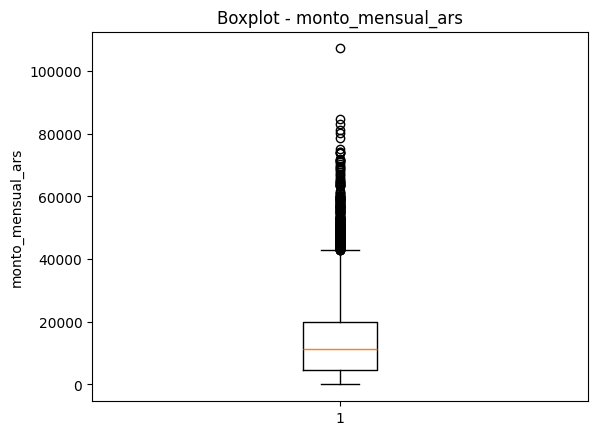

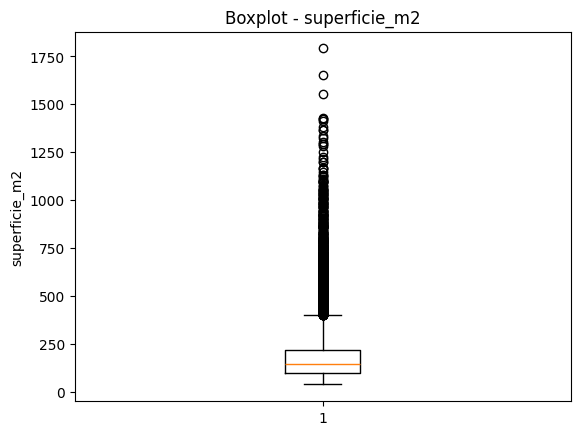

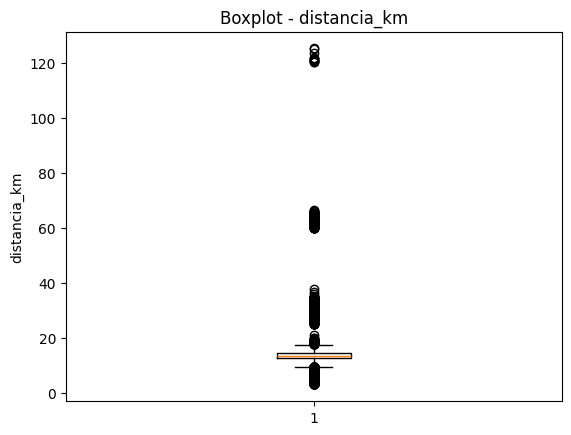

In [6]:
# Limpieza básica del dataset

import numpy as np
import matplotlib.pyplot as plt
df_clean = df.copy()
print("Dimensión original:", df.shape)
print("Dimensión df_clean:", df_clean.shape)
# df_clean['CUIT'] = df_clean['CUIT'].astype(str) # Se elimina ya que la columna 'CUIT' no existe
# df_clean['Fantasía'] = df_clean['Fantasía'].astype(str) # Se elimina ya que la columna 'Fantasía' no existe
df_clean['mes'] = df_clean['mes'].astype(int)
print("\nTipos de datos después de ajustes:")
print(df_clean.dtypes)
duplicados_totales = df_clean.duplicated().sum()
print(f"\nCantidad de filas completamente duplicadas en df_clean: {duplicados_totales}")
cols_clave = ['id_cliente_anon', 'mes', 'tipo_servicio'] # Se corrige 'id_cliente' a 'id_cliente_anon'
duplicados_clave = df_clean.duplicated(subset=cols_clave).sum()
print(f"Cantidad de posibles duplicados por {cols_clave}: {duplicados_clave}")
if duplicados_clave > 0:
    print("\nEjemplos de posibles duplicados por id_cliente_anon, mes y tipo_servicio:")
    display(df_clean[df_clean.duplicated(subset=cols_clave, keep=False)].head())
plt.figure()
plt.boxplot(df_clean['monto_mensual_ars'])
plt.title('Boxplot - monto_mensual_ars')
plt.ylabel('monto_mensual_ars')
plt.show()
plt.figure()
plt.boxplot(df_clean['superficie_m2'])
plt.title('Boxplot - superficie_m2')
plt.ylabel('superficie_m2')
plt.show()
plt.figure()
plt.boxplot(df_clean['distancia_km'])
plt.title('Boxplot - distancia_km')
plt.ylabel('distancia_km')
plt.show()


Definición de X, y y revisión

In [7]:
# Definir variable objetivo (y) y variables explicativas (X)
target = 'monto_mensual_ars'
numeric_features = ['mes', 'superficie_m2', 'distancia_km', 'tecnico_id', 'servicios_mes']
categorical_features = ['zona', 'tipo_cliente', 'tipo_servicio']

features = numeric_features + categorical_features
X = df_clean[features]
y = df_clean[target]
print("Columnas utilizadas como features (X):")
print(features)
print("\nVariable objetivo (y):", target)
print("\nDimensión de X:", X.shape)
print("Dimensión de y:", y.shape)
print("\nPrimeras filas de X:")
display(X.head())
print("\nPrimeros valores de y:")
print(y.head())


Columnas utilizadas como features (X):
['mes', 'superficie_m2', 'distancia_km', 'tecnico_id', 'servicios_mes', 'zona', 'tipo_cliente', 'tipo_servicio']

Variable objetivo (y): monto_mensual_ars

Dimensión de X: (19428, 8)
Dimensión de y: (19428,)

Primeras filas de X:


,mes,superficie_m2,distancia_km,tecnico_id,servicios_mes,zona,tipo_cliente,tipo_servicio
0,1,301,10.7,1,3,RAWSON,Residencial,Fumigación
1,2,76,11.0,6,1,RAWSON,Residencial,Desratización
2,3,99,9.0,8,0,RAWSON,Residencial,Desinfección
3,4,53,9.7,4,0,RAWSON,Residencial,Desinfección
4,5,110,9.9,4,1,RAWSON,Residencial,Fumigación



Primeros valores de y:
0    29002
1     6273
2     4280
3      497
4     9185
Name: monto_mensual_ars, dtype: int64


CRISP-DM: Preparación de datos

In [8]:
# Preprocesamiento de variables y división en entrenamiento / prueba

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
print("Variables numéricas:", numeric_features)
print("Variables categóricas:", categorical_features)
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20% para test
    random_state=42     # semilla para reproducibilidad
)

print("\nTamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)


Variables numéricas: ['mes', 'superficie_m2', 'distancia_km', 'tecnico_id', 'servicios_mes']
Variables categóricas: ['zona', 'tipo_cliente', 'tipo_servicio']

Tamaño de X_train: (15542, 8)
Tamaño de X_test: (3886, 8)
Tamaño de y_train: (15542,)
Tamaño de y_test: (3886,)


CRISP-DM: Modelado.

In [9]:
#  Definir y entrenar el modelo de regresión múltiple

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),      # aplica escalado + One-Hot Encoding
    ('regressor', LinearRegression())    # modelo de regresión lineal múltiple
])


model.fit(X_train, y_train)

print("Modelo de regresión lineal múltiple entrenado correctamente.")


Modelo de regresión lineal múltiple entrenado correctamente.


CRISP-DM: Evaluación.

In [10]:
# Evaluación del modelo de regresión

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Métricas del modelo de regresión múltiple ===")
print(f"MAE  (Error absoluto medio): {mae:,.2f}")
print(f"RMSE (Raíz error cuadrático medio): {rmse:,.2f}")
print(f"R²   (Coeficiente de determinación): {r2:,.4f}")


=== Métricas del modelo de regresión múltiple ===
MAE  (Error absoluto medio): 2,474.16
RMSE (Raíz error cuadrático medio): 3,172.47
R²   (Coeficiente de determinación): 0.9213


Gráfico: valores reales vs. predichos

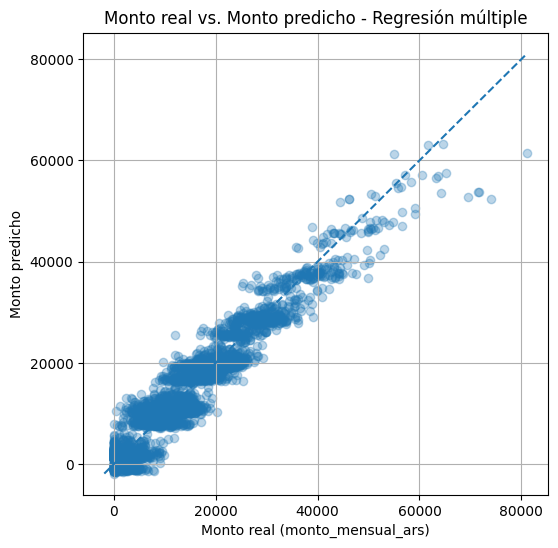

In [11]:
# Gráfico de comparación entre valores reales y predichos

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Monto real (monto_mensual_ars)')
plt.ylabel('Monto predicho')
plt.title('Monto real vs. Monto predicho - Regresión múltiple')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.grid(True)
plt.show()


Exportar el CSV con predicciones

In [12]:
# Construir un DataFrame con resultados y exportar a CSV


X_test_reset = X_test.copy()
y_test_reset = y_test.copy()

# Guardo
X_test_reset = X_test_reset.reset_index(drop=False)  # crea columna 'index'
y_test_reset = y_test_reset.reset_index(drop=True)
# Se corrigieron los nombres de las columnas que no existían
resultados = df_clean.loc[X_test_reset['index'], ['id_cliente_anon', 'mes']]
resultados = resultados.reset_index(drop=True)
resultados['monto_real_ars'] = y_test_reset
resultados['monto_predicho_ars'] = y_pred
resultados['error_ars'] = resultados['monto_real_ars'] - resultados['monto_predicho_ars']
nombre_archivo_salida = 'predicciones_regresion.csv'
resultados.to_csv(nombre_archivo_salida, index=False)

print(f"Archivo '{nombre_archivo_salida}' generado correctamente.")
display(resultados.head())


Archivo 'predicciones_regresion.csv' generado correctamente.


,id_cliente_anon,mes,monto_real_ars,monto_predicho_ars,error_ars
0,550,12,13737,16620.975538,-2883.975538
1,992,1,10057,10676.488071,-619.488071
2,1043,2,10319,10479.306696,-160.306696
3,586,10,21717,20624.358657,1092.641343
4,1256,3,13036,10520.837809,2515.162191
